In [1]:
import pandas as pd
pd.set_option('display.max_column', 250)
pd.set_option('display.max_row', 2000)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 4)
rcParams['figure.dpi'] = 100

In [2]:
def get_info(df, series_name):
    cols = ["classifications correct (percent)", 
            "Kappa Statistic (percent)", 
            "F1 Score (percent)", 
            "Precision (percent)", 
            "Recall (percent)",
            "Change detected"
           ]

    result = pd.Series([df[cols[0]].mean(),
                         df[cols[1]].mean(),
                         df[cols[2]].mean(),
                         df[cols[3]].mean(),
                         df[cols[4]].mean(),
                         df[cols[5]].sum()], index=cols, name=series_name
                       )
    
    for col in cols[:-1]:
        df[col].plot()
    plt.xlabel('Instances')
    plt.ylabel('Percent')
    plt.xticks([])
    plt.legend(loc=3)
    fig = plt.gcf()
    plt.show()
    
    return result, fig

def get_results(dataset_folder):
    
    cols = ["classifications correct (percent)", 
        "Kappa Statistic (percent)", 
        "F1 Score (percent)", 
        "Precision (percent)", 
        "Recall (percent)",
        "Change detected"
       ]
    
    from os import chdir
    import glob

    dataset= dataset_folder
    path = '/Users/Feranor/Uni.li/Thesis/Thesis/drift_behaviour/moa_outputs/outputs/'+dataset+'/'
    chdir(path)
    files = glob.glob('*.csv')

    results = pd.DataFrame(columns=cols)

    for file in files:
        print(file[:-4].upper()+'\n'+'='*100)
        df = pd.read_csv(path+file, dtype='float', na_values='?')
        result, fig = get_info(df, file[:-4].upper())
        fig.suptitle(file[:-4].upper()+' on '+dataset.title()+' Dataset')
        fig.savefig(file[:-4].upper()+'_'+dataset+'.png', dpi=300)
        print(result)
        results = pd.concat([results, pd.DataFrame(result).transpose()])
    display(results)
    results.to_excel(path+'results.xlsx')

PHT


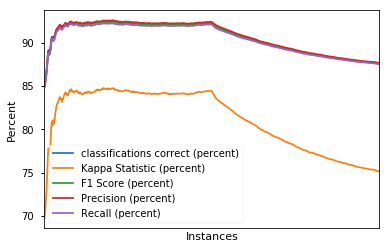

classifications correct (percent)    90.642943
Kappa Statistic (percent)            81.132403
F1 Score (percent)                   90.591684
Precision (percent)                  90.721578
Recall (percent)                     90.462186
Change detected                       1.000000
Name: PHT, dtype: float64
ADWIN


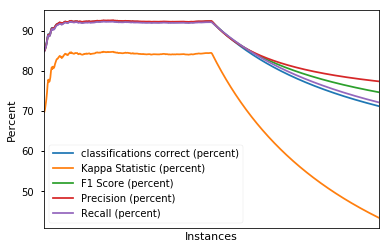

classifications correct (percent)       85.645072
Kappa Statistic (percent)               71.456178
F1 Score (percent)                      86.437809
Precision (percent)                     87.039817
Recall (percent)                        85.860237
Change detected                      24913.000000
Name: ADWIN, dtype: float64
CUSUM


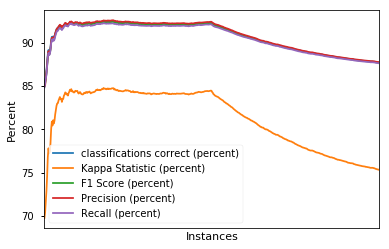

classifications correct (percent)    90.707208
Kappa Statistic (percent)            81.264329
F1 Score (percent)                   90.654596
Precision (percent)                  90.776413
Recall (percent)                     90.533135
Change detected                       1.000000
Name: CUSUM, dtype: float64
RDDM


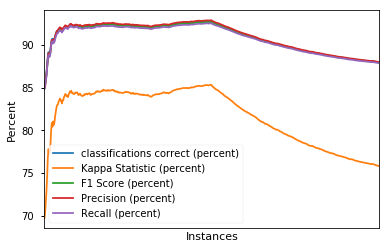

classifications correct (percent)    90.935185
Kappa Statistic (percent)            81.721897
F1 Score (percent)                   90.885246
Precision (percent)                  91.013159
Recall (percent)                     90.757728
Change detected                       5.000000
Name: RDDM, dtype: float64
DDM


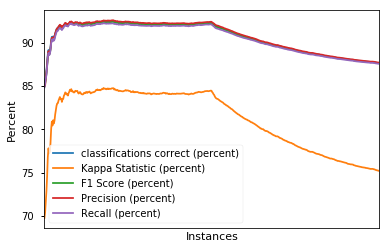

classifications correct (percent)    90.666944
Kappa Statistic (percent)            81.181437
F1 Score (percent)                   90.615310
Precision (percent)                  90.742981
Recall (percent)                     90.488024
Change detected                       1.000000
Name: DDM, dtype: float64
SEQDRIFT2


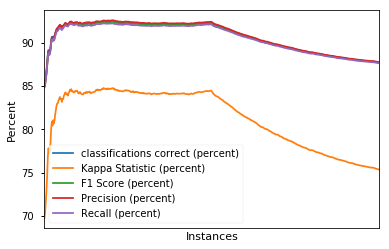

classifications correct (percent)    90.713707
Kappa Statistic (percent)            81.278008
F1 Score (percent)                   90.660785
Precision (percent)                  90.780799
Recall (percent)                     90.541119
Change detected                       1.000000
Name: SEQDRIFT2, dtype: float64
PL


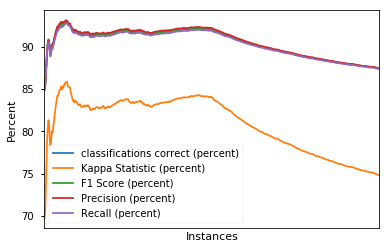

classifications correct (percent)     90.508227
Kappa Statistic (percent)             80.862814
F1 Score (percent)                    90.454022
Precision (percent)                   90.578963
Recall (percent)                      90.329484
Change detected                      155.000000
Name: PL, dtype: float64
EDDM


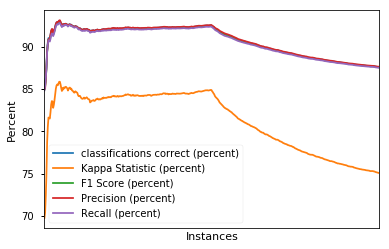

classifications correct (percent)    90.708177
Kappa Statistic (percent)            81.278128
F1 Score (percent)                   90.653269
Precision (percent)                  90.742038
Recall (percent)                     90.564692
Change detected                      21.000000
Name: EDDM, dtype: float64
STEPD


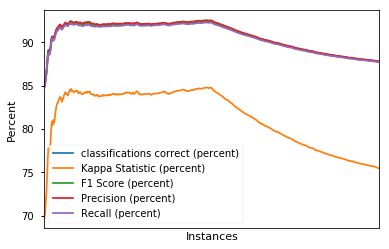

classifications correct (percent)    90.767821
Kappa Statistic (percent)            81.392817
F1 Score (percent)                   90.712068
Precision (percent)                  90.811232
Recall (percent)                     90.613145
Change detected                      15.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,90.642943,81.132403,90.591684,90.721578,90.462186,1.0
ADWIN,85.645072,71.456178,86.437809,87.039817,85.860237,24913.0
CUSUM,90.707208,81.264329,90.654596,90.776413,90.533135,1.0
RDDM,90.935185,81.721897,90.885246,91.013159,90.757728,5.0
DDM,90.666944,81.181437,90.615310,90.742981,90.488024,1.0
SEQDRIFT2,90.713707,81.278008,90.660785,90.780799,90.541119,1.0
PL,90.508227,80.862814,90.454022,90.578963,90.329484,155.0
EDDM,90.708177,81.278128,90.653269,90.742038,90.564692,21.0
STEPD,90.767821,81.392817,90.712068,90.811232,90.613145,15.0


In [67]:
get_results('sine')

PHT


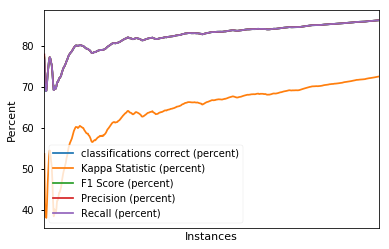

classifications correct (percent)    82.423368
Kappa Statistic (percent)            64.845381
F1 Score (percent)                   82.425201
Precision (percent)                  82.427633
Recall (percent)                     82.422793
Change detected                       7.000000
Name: PHT, dtype: float64
ADWIN


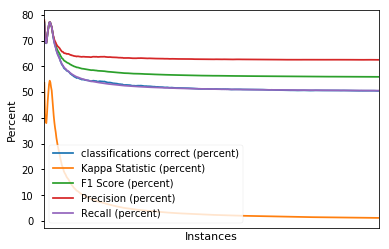

classifications correct (percent)       52.861779
Kappa Statistic (percent)                5.593768
F1 Score (percent)                      57.581405
Precision (percent)                     63.409844
Recall (percent)                        52.793063
Change detected                      48753.000000
Name: ADWIN, dtype: float64
CUSUM


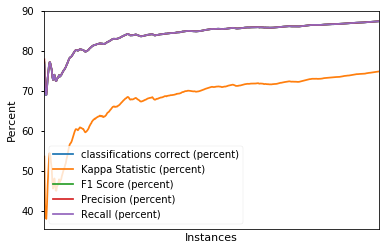

classifications correct (percent)    84.131185
Kappa Statistic (percent)            68.260817
F1 Score (percent)                   84.133279
Precision (percent)                  84.136378
Recall (percent)                     84.130205
Change detected                      10.000000
Name: CUSUM, dtype: float64
RDDM


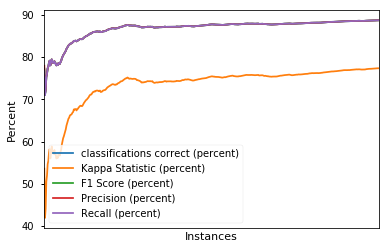

classifications correct (percent)    86.721805
Kappa Statistic (percent)            73.441522
F1 Score (percent)                   86.723060
Precision (percent)                  86.726324
Recall (percent)                     86.719820
Change detected                      26.000000
Name: RDDM, dtype: float64
DDM


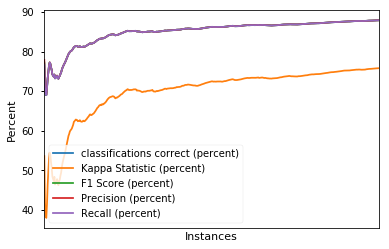

classifications correct (percent)    84.972661
Kappa Statistic (percent)            69.943456
F1 Score (percent)                   84.974740
Precision (percent)                  84.978370
Recall (percent)                     84.971135
Change detected                      20.000000
Name: DDM, dtype: float64
SEQDRIFT2


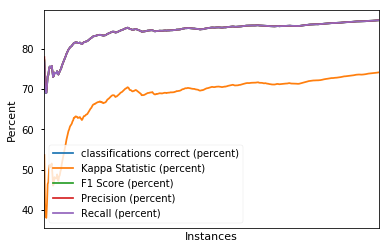

classifications correct (percent)    84.325484
Kappa Statistic (percent)            68.649575
F1 Score (percent)                   84.326928
Precision (percent)                  84.329177
Recall (percent)                     84.324704
Change detected                      19.000000
Name: SEQDRIFT2, dtype: float64
PL


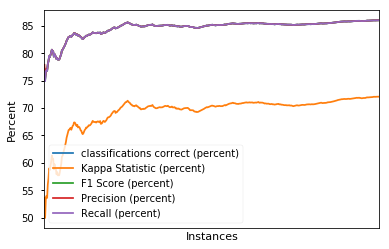

classifications correct (percent)     84.687459
Kappa Statistic (percent)             69.372645
F1 Score (percent)                    84.688788
Precision (percent)                   84.692001
Recall (percent)                      84.685602
Change detected                      237.000000
Name: PL, dtype: float64
EDDM


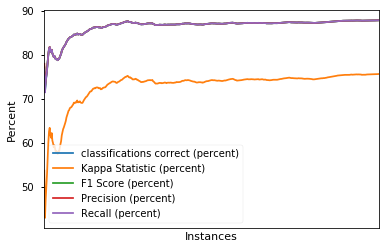

classifications correct (percent)    86.438031
Kappa Statistic (percent)            72.874278
F1 Score (percent)                   86.442446
Precision (percent)                  86.448545
Recall (percent)                     86.436397
Change detected                      62.000000
Name: EDDM, dtype: float64
STEPD


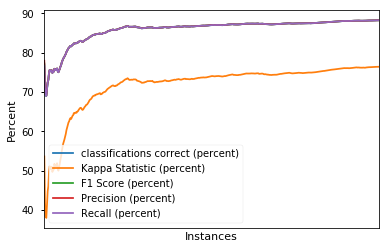

classifications correct (percent)    85.873073
Kappa Statistic (percent)            71.744391
F1 Score (percent)                   85.875878
Precision (percent)                  85.880398
Recall (percent)                     85.871383
Change detected                      26.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,82.423368,64.845381,82.425201,82.427633,82.422793,7.0
ADWIN,52.861779,5.593768,57.581405,63.409844,52.793063,48753.0
CUSUM,84.131185,68.260817,84.133279,84.136378,84.130205,10.0
RDDM,86.721805,73.441522,86.723060,86.726324,86.719820,26.0
DDM,84.972661,69.943456,84.974740,84.978370,84.971135,20.0
SEQDRIFT2,84.325484,68.649575,84.326928,84.329177,84.324704,19.0
PL,84.687459,69.372645,84.688788,84.692001,84.685602,237.0
EDDM,86.438031,72.874278,86.442446,86.448545,86.436397,62.0
STEPD,85.873073,71.744391,85.875878,85.880398,85.871383,26.0


In [68]:
get_results('hyperplane')

PHT


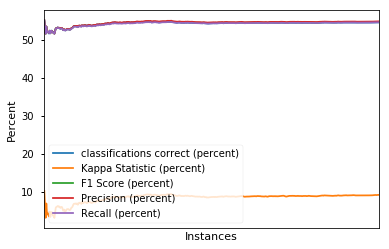

classifications correct (percent)    54.268239
Kappa Statistic (percent)             8.430507
F1 Score (percent)                   54.335658
Precision (percent)                  54.460997
Recall (percent)                     54.210925
Change detected                       0.000000
Name: PHT, dtype: float64
ADWIN


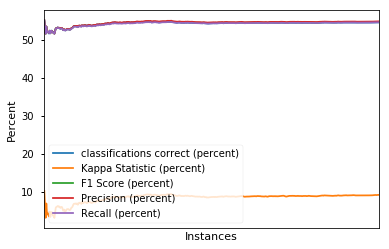

classifications correct (percent)    54.268239
Kappa Statistic (percent)             8.430507
F1 Score (percent)                   54.335658
Precision (percent)                  54.460997
Recall (percent)                     54.210925
Change detected                       0.000000
Name: ADWIN, dtype: float64
CUSUM


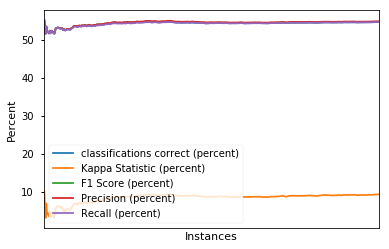

classifications correct (percent)    54.276308
Kappa Statistic (percent)             8.447240
F1 Score (percent)                   54.330670
Precision (percent)                  54.442503
Recall (percent)                     54.219328
Change detected                       1.000000
Name: CUSUM, dtype: float64
RDDM


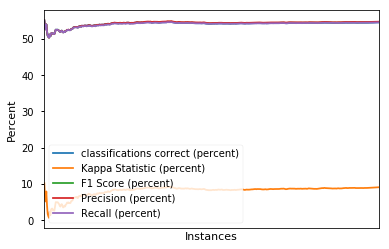

classifications correct (percent)    54.113699
Kappa Statistic (percent)             8.134135
F1 Score (percent)                   54.162022
Precision (percent)                  54.261024
Recall (percent)                     54.063411
Change detected                       4.000000
Name: RDDM, dtype: float64
DDM


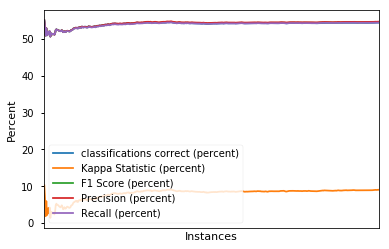

classifications correct (percent)    54.069600
Kappa Statistic (percent)             8.040985
F1 Score (percent)                   54.126491
Precision (percent)                  54.236670
Recall (percent)                     54.016795
Change detected                       1.000000
Name: DDM, dtype: float64
SEQDRIFT2


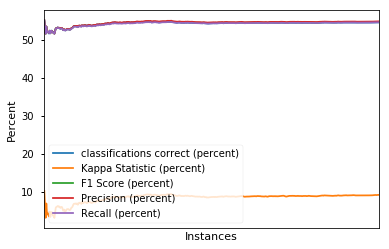

classifications correct (percent)    54.268239
Kappa Statistic (percent)             8.430507
F1 Score (percent)                   54.335658
Precision (percent)                  54.460997
Recall (percent)                     54.210925
Change detected                       0.000000
Name: SEQDRIFT2, dtype: float64
PL


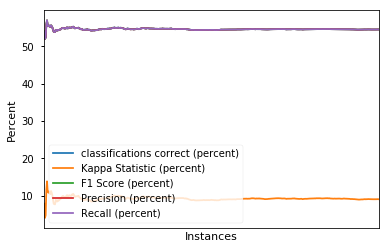

classifications correct (percent)      54.620771
Kappa Statistic (percent)               9.216157
F1 Score (percent)                     54.610544
Precision (percent)                    54.613961
Recall (percent)                       54.607128
Change detected                      1740.000000
Name: PL, dtype: float64
EDDM


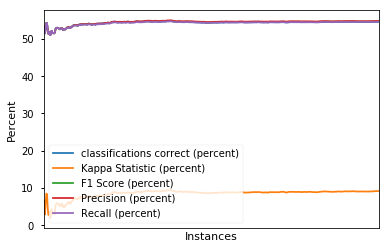

classifications correct (percent)    54.280533
Kappa Statistic (percent)             8.473274
F1 Score (percent)                   54.336780
Precision (percent)                  54.441029
Recall (percent)                     54.232964
Change detected                       4.000000
Name: EDDM, dtype: float64
STEPD


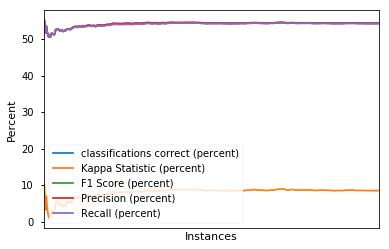

classifications correct (percent)    54.042788
Kappa Statistic (percent)             7.988672
F1 Score (percent)                   54.066498
Precision (percent)                  54.142589
Recall (percent)                     53.990655
Change detected                      22.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,54.268239,8.430507,54.335658,54.460997,54.210925,0.0
ADWIN,54.268239,8.430507,54.335658,54.460997,54.210925,0.0
CUSUM,54.276308,8.447240,54.330670,54.442503,54.219328,1.0
RDDM,54.113699,8.134135,54.162022,54.261024,54.063411,4.0
DDM,54.069600,8.040985,54.126491,54.236670,54.016795,1.0
SEQDRIFT2,54.268239,8.430507,54.335658,54.460997,54.210925,0.0
PL,54.620771,9.216157,54.610544,54.613961,54.607128,1740.0
EDDM,54.280533,8.473274,54.336780,54.441029,54.232964,4.0
STEPD,54.042788,7.988672,54.066498,54.142589,53.990655,22.0


In [71]:
get_results('rbf')

PHT


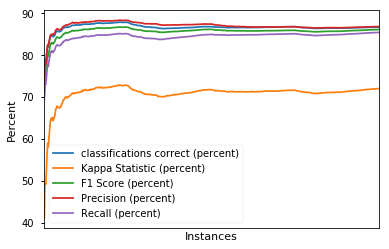

classifications correct (percent)    86.660010
Kappa Statistic (percent)            70.879958
F1 Score (percent)                   85.714124
Precision (percent)                  87.015966
Recall (percent)                     84.454920
Change detected                       2.000000
Name: PHT, dtype: float64
ADWIN


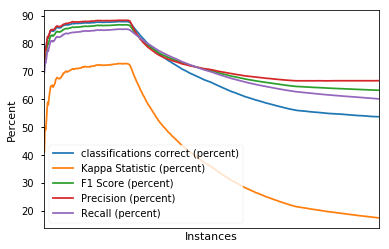

classifications correct (percent)       69.155411
Kappa Statistic (percent)               41.674947
F1 Score (percent)                      73.042765
Precision (percent)                     74.462917
Recall (percent)                        71.713096
Change detected                      37137.000000
Name: ADWIN, dtype: float64
CUSUM


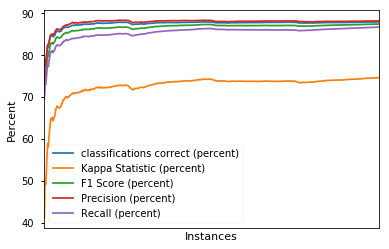

classifications correct (percent)    87.510330
Kappa Statistic (percent)            72.740934
F1 Score (percent)                   86.620708
Precision (percent)                  87.872828
Recall (percent)                     85.407148
Change detected                       3.000000
Name: CUSUM, dtype: float64
RDDM


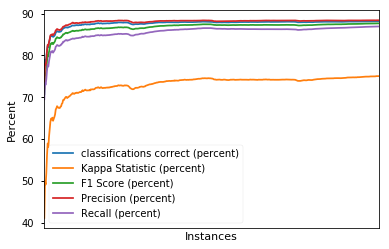

classifications correct (percent)    87.634674
Kappa Statistic (percent)            73.021762
F1 Score (percent)                   86.751912
Precision (percent)                  87.976975
Recall (percent)                     85.564024
Change detected                       3.000000
Name: RDDM, dtype: float64
DDM


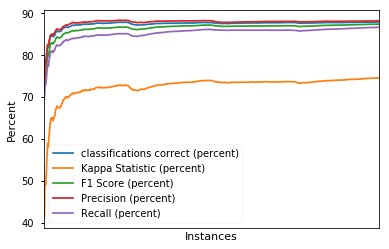

classifications correct (percent)    87.445284
Kappa Statistic (percent)            72.587646
F1 Score (percent)                   86.552943
Precision (percent)                  87.830431
Recall (percent)                     85.315451
Change detected                       4.000000
Name: DDM, dtype: float64
SEQDRIFT2


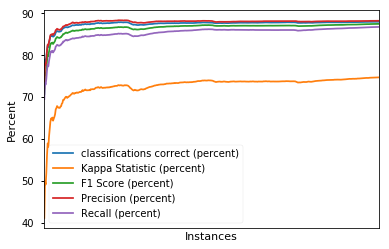

classifications correct (percent)    87.475279
Kappa Statistic (percent)            72.660332
F1 Score (percent)                   86.583291
Precision (percent)                  87.843191
Recall (percent)                     85.362488
Change detected                       4.000000
Name: SEQDRIFT2, dtype: float64
PL


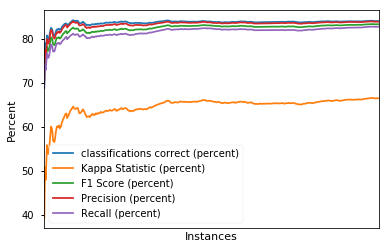

classifications correct (percent)     83.691310
Kappa Statistic (percent)             64.594417
F1 Score (percent)                    82.451614
Precision (percent)                   83.343643
Recall (percent)                      81.580101
Change detected                      178.000000
Name: PL, dtype: float64
EDDM


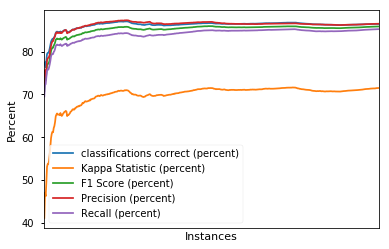

classifications correct (percent)    86.121698
Kappa Statistic (percent)            69.794776
F1 Score (percent)                   85.100169
Precision (percent)                  86.178066
Recall (percent)                     84.051966
Change detected                      27.000000
Name: EDDM, dtype: float64
STEPD


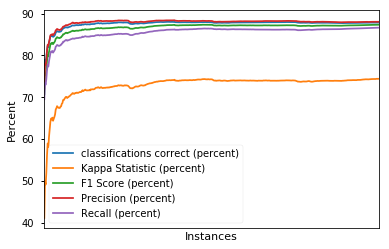

classifications correct (percent)    87.548137
Kappa Statistic (percent)            72.845161
F1 Score (percent)                   86.658402
Precision (percent)                  87.865902
Recall (percent)                     85.487334
Change detected                       8.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,86.660010,70.879958,85.714124,87.015966,84.454920,2.0
ADWIN,69.155411,41.674947,73.042765,74.462917,71.713096,37137.0
CUSUM,87.510330,72.740934,86.620708,87.872828,85.407148,3.0
RDDM,87.634674,73.021762,86.751912,87.976975,85.564024,3.0
DDM,87.445284,72.587646,86.552943,87.830431,85.315451,4.0
SEQDRIFT2,87.475279,72.660332,86.583291,87.843191,85.362488,4.0
PL,83.691310,64.594417,82.451614,83.343643,81.580101,178.0
EDDM,86.121698,69.794776,85.100169,86.178066,84.051966,27.0
STEPD,87.548137,72.845161,86.658402,87.865902,85.487334,8.0


In [72]:
get_results('sea')

PHT


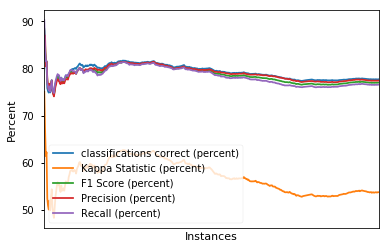

classifications correct (percent)    79.197192
Kappa Statistic (percent)            57.064241
F1 Score (percent)                   78.627181
Precision (percent)                  78.925737
Recall (percent)                     78.333134
Change detected                      19.000000
Name: PHT, dtype: float64
ADWIN


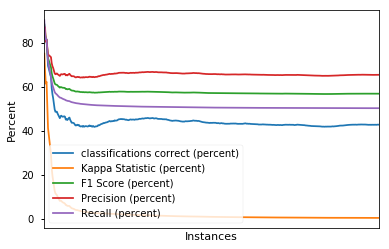

classifications correct (percent)       44.378863
Kappa Statistic (percent)                2.792199
F1 Score (percent)                      57.824628
Precision (percent)                     65.891107
Recall (percent)                        51.563965
Change detected                      44833.000000
Name: ADWIN, dtype: float64
CUSUM


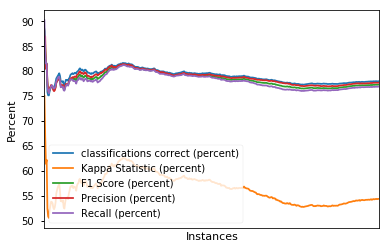

classifications correct (percent)    78.983522
Kappa Statistic (percent)            56.560921
F1 Score (percent)                   78.358359
Precision (percent)                  78.681340
Recall (percent)                     78.039331
Change detected                      25.000000
Name: CUSUM, dtype: float64
RDDM


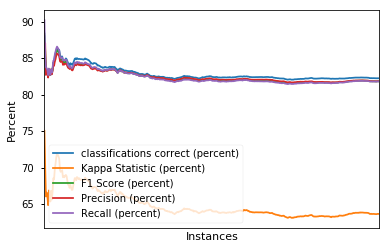

classifications correct (percent)     82.843841
Kappa Statistic (percent)             64.840246
F1 Score (percent)                    82.434927
Precision (percent)                   82.467711
Recall (percent)                      82.402694
Change detected                      167.000000
Name: RDDM, dtype: float64
DDM


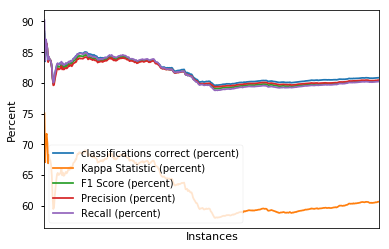

classifications correct (percent)     81.711745
Kappa Statistic (percent)             62.534905
F1 Score (percent)                    81.311339
Precision (percent)                   81.330036
Recall (percent)                      81.294078
Change detected                      179.000000
Name: DDM, dtype: float64
SEQDRIFT2


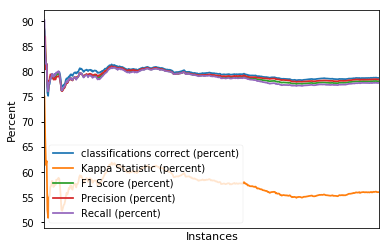

classifications correct (percent)    79.460441
Kappa Statistic (percent)            57.696309
F1 Score (percent)                   78.903058
Precision (percent)                  79.107753
Recall (percent)                     78.700617
Change detected                      56.000000
Name: SEQDRIFT2, dtype: float64
PL


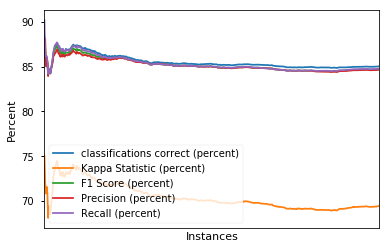

classifications correct (percent)     85.533331
Kappa Statistic (percent)             70.438898
F1 Score (percent)                    85.232334
Precision (percent)                   85.163768
Recall (percent)                      85.301457
Change detected                      450.000000
Name: PL, dtype: float64
EDDM


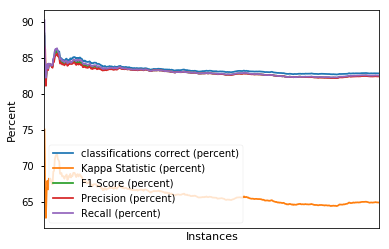

classifications correct (percent)     83.376964
Kappa Statistic (percent)             66.028003
F1 Score (percent)                    83.025771
Precision (percent)                   82.964767
Recall (percent)                      83.087298
Change detected                      232.000000
Name: EDDM, dtype: float64
STEPD


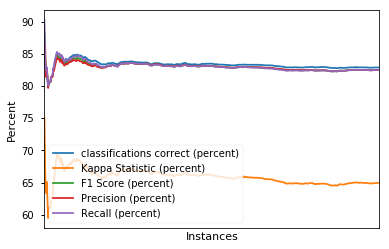

classifications correct (percent)     83.326653
Kappa Statistic (percent)             65.892637
F1 Score (percent)                    82.960061
Precision (percent)                   82.932465
Recall (percent)                      82.988215
Change detected                      193.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,79.197192,57.064241,78.627181,78.925737,78.333134,19.0
ADWIN,44.378863,2.792199,57.824628,65.891107,51.563965,44833.0
CUSUM,78.983522,56.560921,78.358359,78.681340,78.039331,25.0
RDDM,82.843841,64.840246,82.434927,82.467711,82.402694,167.0
DDM,81.711745,62.534905,81.311339,81.330036,81.294078,179.0
SEQDRIFT2,79.460441,57.696309,78.903058,79.107753,78.700617,56.0
PL,85.533331,70.438898,85.232334,85.163768,85.301457,450.0
EDDM,83.376964,66.028003,83.025771,82.964767,83.087298,232.0
STEPD,83.326653,65.892637,82.960061,82.932465,82.988215,193.0


In [74]:
get_results('elec')

PHT


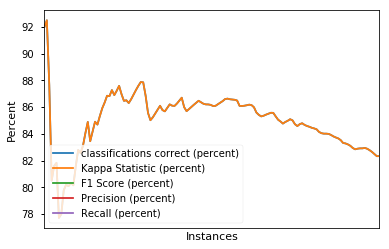

classifications correct (percent)    84.973536
Kappa Statistic (percent)            84.973536
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      10.000000
Name: PHT, dtype: float64
ADWIN


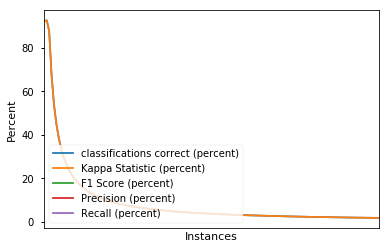

classifications correct (percent)        9.058814
Kappa Statistic (percent)                9.058814
F1 Score (percent)                            NaN
Precision (percent)                           NaN
Recall (percent)                              NaN
Change detected                      13591.000000
Name: ADWIN, dtype: float64
CUSUM


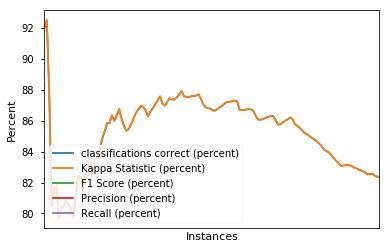

classifications correct (percent)    85.26002
Kappa Statistic (percent)            85.26002
F1 Score (percent)                        NaN
Precision (percent)                       NaN
Recall (percent)                          NaN
Change detected                      11.00000
Name: CUSUM, dtype: float64
RDDM


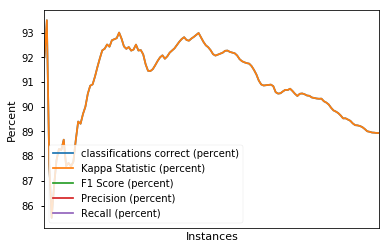

classifications correct (percent)    90.948867
Kappa Statistic (percent)            90.948867
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      37.000000
Name: RDDM, dtype: float64
DDM


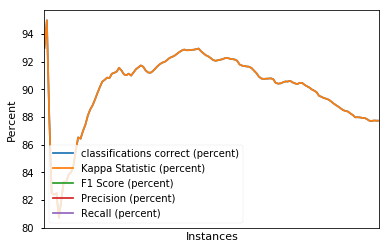

classifications correct (percent)    90.042342
Kappa Statistic (percent)            90.042342
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      36.000000
Name: DDM, dtype: float64
SEQDRIFT2


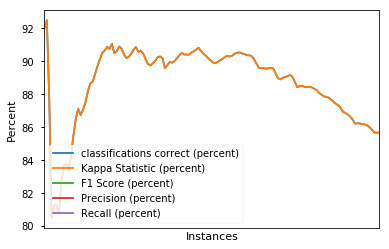

classifications correct (percent)    88.729303
Kappa Statistic (percent)            88.729303
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      31.000000
Name: SEQDRIFT2, dtype: float64
PL


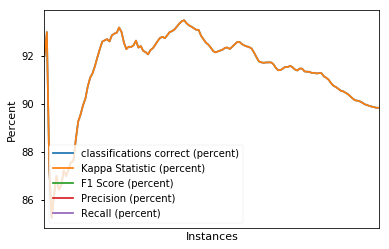

classifications correct (percent)    91.408083
Kappa Statistic (percent)            91.408083
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      45.000000
Name: PL, dtype: float64
EDDM


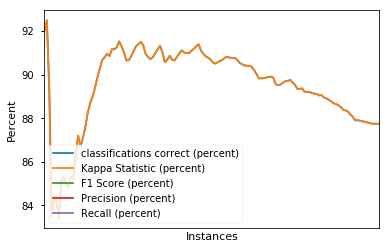

classifications correct (percent)    89.510284
Kappa Statistic (percent)            89.510284
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      36.000000
Name: EDDM, dtype: float64
STEPD


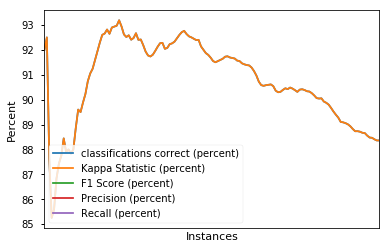

classifications correct (percent)    90.759291
Kappa Statistic (percent)            90.759291
F1 Score (percent)                         NaN
Precision (percent)                        NaN
Recall (percent)                           NaN
Change detected                      45.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,84.973536,84.973536,NaN,NaN,NaN,10.0
ADWIN,9.058814,9.058814,NaN,NaN,NaN,13591.0
CUSUM,85.260020,85.260020,NaN,NaN,NaN,11.0
RDDM,90.948867,90.948867,NaN,NaN,NaN,37.0
DDM,90.042342,90.042342,NaN,NaN,NaN,36.0
SEQDRIFT2,88.729303,88.729303,NaN,NaN,NaN,31.0
PL,91.408083,91.408083,NaN,NaN,NaN,45.0
EDDM,89.510284,89.510284,NaN,NaN,NaN,36.0
STEPD,90.759291,90.759291,NaN,NaN,NaN,45.0


In [3]:
get_results('gassensor')

PHT


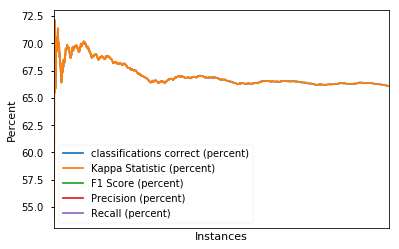

classifications correct (percent)     67.060067
Kappa Statistic (percent)             67.060067
F1 Score (percent)                          NaN
Precision (percent)                         NaN
Recall (percent)                            NaN
Change detected                      540.000000
Name: PHT, dtype: float64
ADWIN


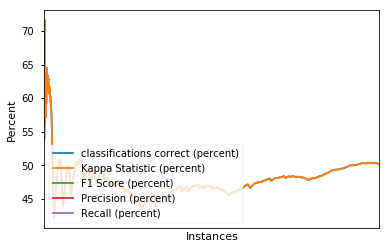

classifications correct (percent)        47.873588
Kappa Statistic (percent)                47.873588
F1 Score (percent)                             NaN
Precision (percent)                            NaN
Recall (percent)                               NaN
Change detected                      827826.000000
Name: ADWIN, dtype: float64
CUSUM


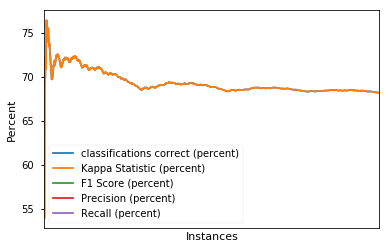

classifications correct (percent)     69.299283
Kappa Statistic (percent)             69.299283
F1 Score (percent)                          NaN
Precision (percent)                         NaN
Recall (percent)                            NaN
Change detected                      777.000000
Name: CUSUM, dtype: float64
RDDM


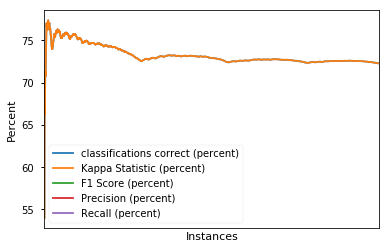

classifications correct (percent)      73.260542
Kappa Statistic (percent)              73.260542
F1 Score (percent)                           NaN
Precision (percent)                          NaN
Recall (percent)                             NaN
Change detected                      2649.000000
Name: RDDM, dtype: float64
DDM


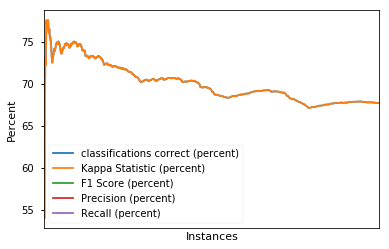

classifications correct (percent)      70.099991
Kappa Statistic (percent)              70.099991
F1 Score (percent)                           NaN
Precision (percent)                          NaN
Recall (percent)                             NaN
Change detected                      2471.000000
Name: DDM, dtype: float64
SEQDRIFT2


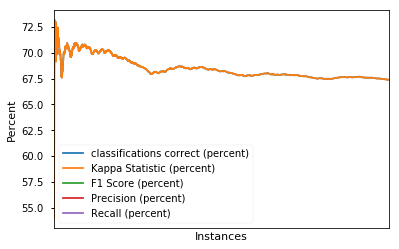

classifications correct (percent)      68.472118
Kappa Statistic (percent)              68.472118
F1 Score (percent)                           NaN
Precision (percent)                          NaN
Recall (percent)                             NaN
Change detected                      1588.000000
Name: SEQDRIFT2, dtype: float64
PL


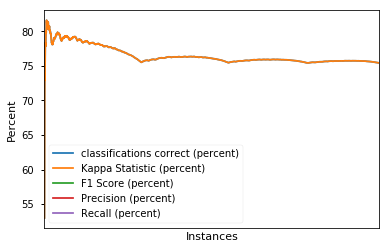

classifications correct (percent)       76.49662
Kappa Statistic (percent)               76.49662
F1 Score (percent)                           NaN
Precision (percent)                          NaN
Recall (percent)                             NaN
Change detected                      12657.00000
Name: PL, dtype: float64
EDDM


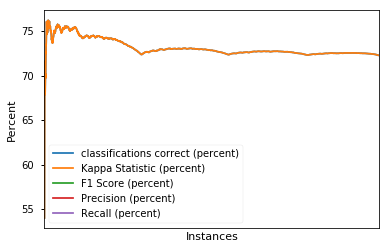

classifications correct (percent)      73.123642
Kappa Statistic (percent)              73.123642
F1 Score (percent)                           NaN
Precision (percent)                          NaN
Recall (percent)                             NaN
Change detected                      5259.000000
Name: EDDM, dtype: float64
STEPD


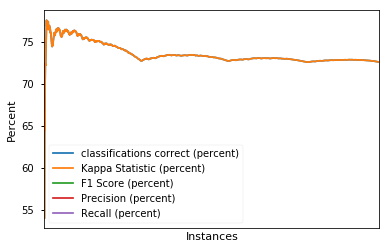

classifications correct (percent)      73.540552
Kappa Statistic (percent)              73.540552
F1 Score (percent)                           NaN
Precision (percent)                          NaN
Recall (percent)                             NaN
Change detected                      3868.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,67.060067,67.060067,NaN,NaN,NaN,540.0
ADWIN,47.873588,47.873588,NaN,NaN,NaN,827826.0
CUSUM,69.299283,69.299283,NaN,NaN,NaN,777.0
RDDM,73.260542,73.260542,NaN,NaN,NaN,2649.0
DDM,70.099991,70.099991,NaN,NaN,NaN,2471.0
SEQDRIFT2,68.472118,68.472118,NaN,NaN,NaN,1588.0
PL,76.496620,76.496620,NaN,NaN,NaN,12657.0
EDDM,73.123642,73.123642,NaN,NaN,NaN,5259.0
STEPD,73.540552,73.540552,NaN,NaN,NaN,3868.0


In [90]:
get_results('poker')

PHT


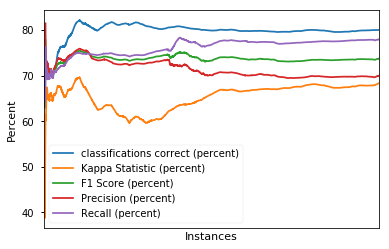

classifications correct (percent)     79.775670
Kappa Statistic (percent)             65.406587
F1 Score (percent)                    73.687167
Precision (percent)                   71.399711
Recall (percent)                      76.200949
Change detected                      117.000000
Name: PHT, dtype: float64
ADWIN


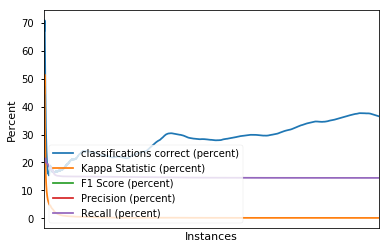

classifications correct (percent)        28.635623
Kappa Statistic (percent)                 0.507512
F1 Score (percent)                             NaN
Precision (percent)                            NaN
Recall (percent)                         14.723088
Change detected                      580085.000000
Name: ADWIN, dtype: float64
CUSUM


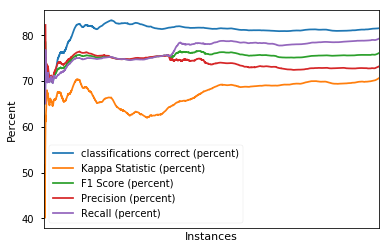

classifications correct (percent)     80.949880
Kappa Statistic (percent)             67.376836
F1 Score (percent)                    75.313794
Precision (percent)                   73.918545
Recall (percent)                      76.817002
Change detected                      286.000000
Name: CUSUM, dtype: float64
RDDM


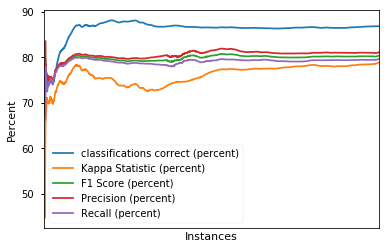

classifications correct (percent)      86.162101
Kappa Statistic (percent)              76.114091
F1 Score (percent)                     79.752037
Precision (percent)                    80.519645
Recall (percent)                       78.998315
Change detected                      2733.000000
Name: RDDM, dtype: float64
DDM


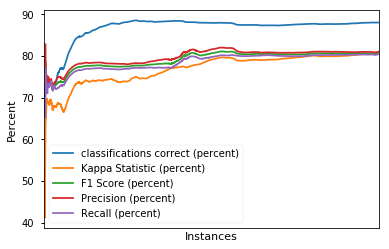

classifications correct (percent)      86.609143
Kappa Statistic (percent)              76.899515
F1 Score (percent)                     79.103812
Precision (percent)                    79.711228
Recall (percent)                       78.504762
Change detected                      4634.000000
Name: DDM, dtype: float64
SEQDRIFT2


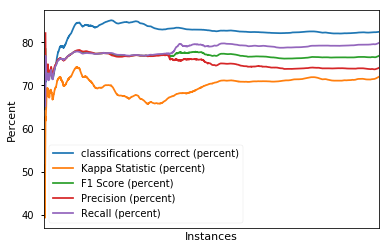

classifications correct (percent)     82.464439
Kappa Statistic (percent)             69.992404
F1 Score (percent)                    76.792137
Precision (percent)                   75.381900
Recall (percent)                      78.292037
Change detected                      757.000000
Name: SEQDRIFT2, dtype: float64
PL


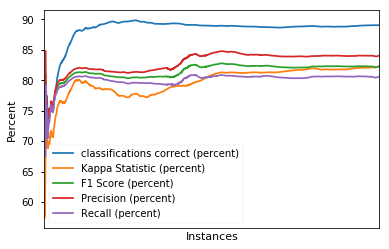

classifications correct (percent)      88.255429
Kappa Statistic (percent)              79.734588
F1 Score (percent)                     81.447519
Precision (percent)                    82.873222
Recall (percent)                       80.073180
Change detected                      5205.000000
Name: PL, dtype: float64
EDDM


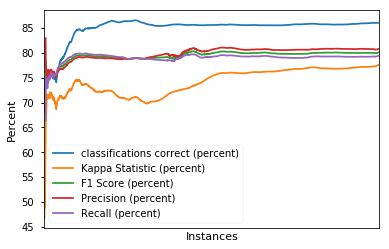

classifications correct (percent)      85.014174
Kappa Statistic (percent)              74.232028
F1 Score (percent)                     79.443242
Precision (percent)                    79.863043
Recall (percent)                       79.030761
Change detected                      2416.000000
Name: EDDM, dtype: float64
STEPD


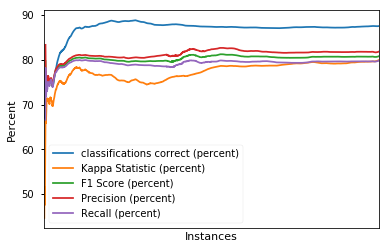

classifications correct (percent)      86.866093
Kappa Statistic (percent)              77.332622
F1 Score (percent)                     80.202713
Precision (percent)                    81.210424
Recall (percent)                       79.219548
Change detected                      3731.000000
Name: STEPD, dtype: float64


,classifications correct (percent),Kappa Statistic (percent),F1 Score (percent),Precision (percent),Recall (percent),Change detected
PHT,79.775670,65.406587,73.687167,71.399711,76.200949,117.0
ADWIN,28.635623,0.507512,NaN,NaN,14.723088,580085.0
CUSUM,80.949880,67.376836,75.313794,73.918545,76.817002,286.0
RDDM,86.162101,76.114091,79.752037,80.519645,78.998315,2733.0
DDM,86.609143,76.899515,79.103812,79.711228,78.504762,4634.0
SEQDRIFT2,82.464439,69.992404,76.792137,75.381900,78.292037,757.0
PL,88.255429,79.734588,81.447519,82.873222,80.073180,5205.0
EDDM,85.014174,74.232028,79.443242,79.863043,79.030761,2416.0
STEPD,86.866093,77.332622,80.202713,81.210424,79.219548,3731.0


In [85]:
get_results('covertype')